<a href="https://colab.research.google.com/github/Aynur04/dz1/blob/main/Dz%2B9_stat0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

3.Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [2]:
# Подготовка данных для sklearn
zp_reshaped = zp.reshape(-1, 1)

# Модель линейной регрессии без intercept
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(zp_reshaped, ks)

# Коэффициент линейной регрессии
beta_1_no_intercept = model_no_intercept.coef_[0]

print(f"Коэффициент линейной регрессии при заработной плате (без intercept): {beta_1_no_intercept:.3f}")

Коэффициент линейной регрессии при заработной плате (без intercept): 5.890


In [3]:
# Модель линейной регрессии с intercept
model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(zp_reshaped, ks)

# Коэффициенты линейной регрессии
beta_0_with_intercept = model_with_intercept.intercept_
beta_1_with_intercept = model_with_intercept.coef_[0]

print(f"Коэффициент интерсепта (beta_0): {beta_0_with_intercept:.3f}")
print(f"Коэффициент линейной регрессии при заработной плате (beta_1): {beta_1_with_intercept:.3f}")


Коэффициент интерсепта (beta_0): 444.177
Коэффициент линейной регрессии при заработной плате (beta_1): 2.621


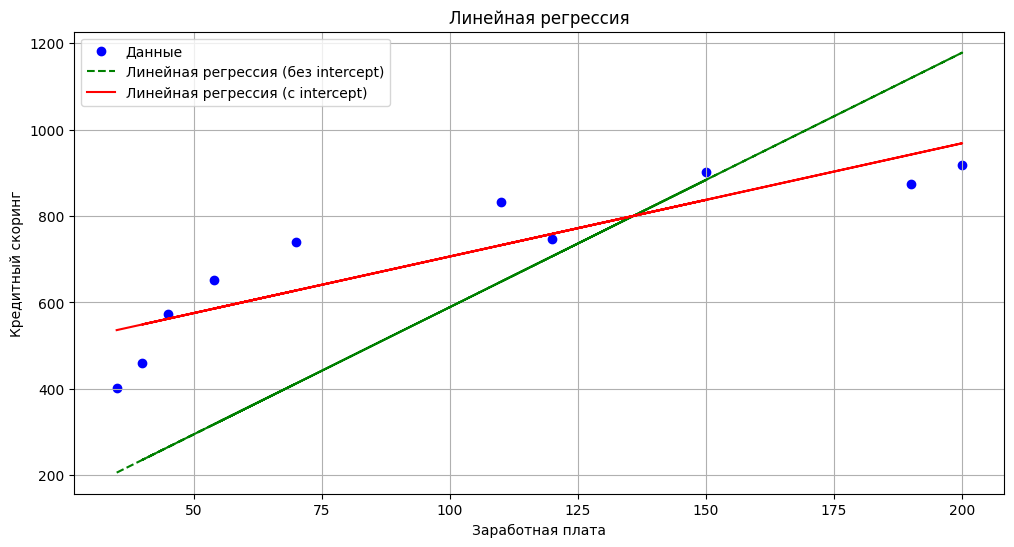

In [4]:
# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(zp, ks, color='blue', label='Данные')
# Линейная регрессия без интерсепта
ks_pred_no_intercept = model_no_intercept.predict(zp_reshaped)
plt.plot(zp, ks_pred_no_intercept, color='green', linestyle='--', label='Линейная регрессия (без intercept)')
# Линейная регрессия с интерсептом
ks_pred_with_intercept = model_with_intercept.predict(zp_reshaped)
plt.plot(zp, ks_pred_with_intercept, color='red', label='Линейная регрессия (с intercept)')
# Подписи осей
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.title('Линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Градиентный спуск без intercept
alpha = 1e-6  # Скорость обучения
n_iterations = 1000  # Количество итераций
m = len(zp)  # Количество точек данных

# Инициализация коэффициента
beta_1 = 0

# Градиентный спуск
for _ in range(n_iterations):
    gradient = (2/m) * np.sum((beta_1 * zp - ks) * zp)
    beta_1 -= alpha * gradient

print(f"Коэффициент линейной регрессии (градиентный спуск без intercept): {beta_1:.3f}")

Коэффициент линейной регрессии (градиентный спуск без intercept): 5.890


In [ ]:
# Градиентный спуск с intercept
alpha = 1e-6  # Скорость обучения
n_iterations = 1000  # Количество итераций
m = len(zp)  # Количество точек данных

# Инициализация коэффициентов
beta_0 = 0
beta_1 = 0

# Градиентный спуск
for _ in range(n_iterations):
    y_pred = beta_0 + beta_1 * zp
    d_beta_0 = (2/m) * np.sum(y_pred - ks)
    d_beta_1 = (2/m) * np.sum((y_pred - ks) * zp)
    beta_0 -= alpha * d_beta_0
    beta_1 -= alpha * d_beta_1

print(f"Коэффициент интерсепта (градиентный спуск): {beta_0:.3f}")
print(f"Коэффициент линейной регрессии при заработной плате (градиентный спуск): {beta_1:.3f}")

In [7]:
# Вычисление ковариации и коэффициента корреляции Пирсона
cov_matrix = np.cov(zp, ks)
cov_zp_ks = cov_matrix[0, 1]
std_zp = np.std(zp, ddof=1)
std_ks = np.std(ks, ddof=1)
pearson_corr = cov_zp_ks / (std_zp * std_ks)

print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")

# Вычисление коэффициента корреляции Пирсона с использованием numpy
pearson_corr_numpy = np.corrcoef(zp, ks)[0, 1]
print(f"Коэффициент корреляции Пирсона (numpy): {pearson_corr_numpy:.3f}")

Коэффициент корреляции Пирсона: 0.887
Коэффициент корреляции Пирсона (numpy): 0.887
